In [122]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.simplefilter("ignore")

In [123]:
# Reading Icu_df set in Pandas Icu_df frame
Icu_df = pd.read_excel("C:/Ass/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")

## EDA 

In [124]:
# look at the Icu_df
Icu_df.head(5)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [125]:
print(Icu_df.shape)

print("This Icu_dfset has ", Icu_df.shape[0], " rows and ", Icu_df.shape[1], " columns.")

(1925, 231)
This Icu_dfset has  1925  rows and  231  columns.


In [126]:
# check for duplicate columns i.e columns having all values exactly equal
duplicated = Icu_df.T.duplicated()
count = 0

# The first instance of a column is marked as 'False', when the value is seen to be repeated in other 
# column(s) it is marked as 'True'
for i in range(len(duplicated)):
    if duplicated[i] == True:
        print(duplicated.index[i], ":", duplicated[i])
        count += 1
        
# 143 duplicate columns
print("total duplicate columns = ", count)

ALBUMIN_MEAN : True
ALBUMIN_MIN : True
ALBUMIN_MAX : True
BE_ARTERIAL_MEAN : True
BE_ARTERIAL_MIN : True
BE_ARTERIAL_MAX : True
BE_ARTERIAL_DIFF : True
BE_VENOUS_MEAN : True
BE_VENOUS_MIN : True
BE_VENOUS_MAX : True
BE_VENOUS_DIFF : True
BIC_ARTERIAL_MEAN : True
BIC_ARTERIAL_MIN : True
BIC_ARTERIAL_MAX : True
BIC_ARTERIAL_DIFF : True
BIC_VENOUS_MEAN : True
BIC_VENOUS_MIN : True
BIC_VENOUS_MAX : True
BIC_VENOUS_DIFF : True
BILLIRUBIN_MEAN : True
BILLIRUBIN_MIN : True
BILLIRUBIN_MAX : True
BILLIRUBIN_DIFF : True
BLAST_MEAN : True
BLAST_MIN : True
BLAST_MAX : True
BLAST_DIFF : True
CALCIUM_MEAN : True
CALCIUM_MIN : True
CALCIUM_MAX : True
CALCIUM_DIFF : True
CREATININ_MEAN : True
CREATININ_MIN : True
CREATININ_MAX : True
CREATININ_DIFF : True
FFA_MEAN : True
FFA_MIN : True
FFA_MAX : True
FFA_DIFF : True
GGT_MEAN : True
GGT_MIN : True
GGT_MAX : True
GGT_DIFF : True
GLUCOSE_MEAN : True
GLUCOSE_MIN : True
GLUCOSE_MAX : True
GLUCOSE_DIFF : True
HEMATOCRITE_MEAN : True
HEMATOCRITE_MIN : True
H

In [127]:
Icu_df = Icu_df.T.drop_duplicates().T

In [128]:
# check the shape here : 231 - 143 = 88
Icu_df.shape

(1925, 88)

In [129]:
def generate_icu_feature(p_id):
    df = Icu_df[Icu_df['PATIENT_VISIT_IDENTIFIER']==p_id]
    icu_track = df['ICU']
    icu = False
    for t in icu_track:
        icu = icu or t
    return icu

Icu_df['ICU'] = Icu_df.apply(lambda x : generate_icu_feature(x['PATIENT_VISIT_IDENTIFIER']), axis = 1)

In [130]:
 #all unique ids
patient_id = Icu_df['PATIENT_VISIT_IDENTIFIER'].unique()

#
NA_filled_first_window = []

# Iterate for each unique patient id
for p_id in patient_id:
    # create a temporary Icu_dfframe to hold details for each patient
    temp = Icu_df[ Icu_df['PATIENT_VISIT_IDENTIFIER'] == p_id ]
    # Fill missing Icu_df with mean of values
    temp.fillna(temp.mean(),inplace=True)
    # using Icu_dfframe.iloc[[0]] => returns a Icu_dfframe
    # using Icu_dfframe.iloc[0] => returns a series
    NA_filled_first_window.append(temp.iloc[[0]])
    
# Concatenate Icu_dfframes from NA_filled_first_window to assemble the final Icu_dfframe
final_Icu_df = pd.concat(NA_filled_first_window)

In [131]:
print(final_Icu_df)

      PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                            0            1          60th       0   
5                            1            1          90th       1   
10                           2            0          10th       0   
15                           3            0          40th       1   
20                           4            0          10th       0   
...                        ...          ...           ...     ...   
1900                       380            0          40th       1   
1905                       381            1    Above 90th       0   
1910                       382            0          50th       0   
1915                       383            0          40th       1   
1920                       384            0          50th       1   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                    0.0                 0.0                 0.0   
5                    0.0           

In [132]:
# Find the nan value
final_Icu_df[ final_Icu_df['DISEASE GROUPING 2'].isna() ]

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
995,199,0,10th,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2,0


In [133]:
# the patient with ID = 199 has all values as NaN, hence drop this patient details
final_Icu_df = final_Icu_df[ final_Icu_df['PATIENT_VISIT_IDENTIFIER'] != 199 ]

## DATA VISUALIZATION

In [134]:
pd.set_option('display.max_rows', len(final_Icu_df))
# datatypes of all the columns
final_Icu_df

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
5,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,1
10,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.750000,-0.885522,-0.595604,-0.419448,-0.681860,-0.792832,-0.752732,-0.887561,0-2,1
15,3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.682540,-0.723906,-0.769565,-0.685906,-0.689698,-0.776583,-0.682540,-0.724145,0-2,0
20,4,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.761905,-0.959596,-0.884058,-0.826611,-0.839287,-0.896057,-0.766042,-0.960291,0-2,0
25,5,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.904762,-0.966330,-0.873174,-0.799242,-0.856110,-0.979689,-0.904177,-0.967019,0-2,0
30,6,1,70th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.888889,-0.380471,-0.961353,-0.879195,-0.927077,-0.913413,-0.890700,-0.360825,0-2,0
35,7,0,20th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.888889,-0.966330,-0.891551,-0.817431,-0.686446,-0.939068,-0.888823,-0.966710,0-2,0
40,8,0,50th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-0.946128,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.946233,0-2,0
45,9,1,80th,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.833333,-0.959596,-0.869565,-0.831735,-0.904071,-0.808065,-0.835604,-0.959202,0-2,0


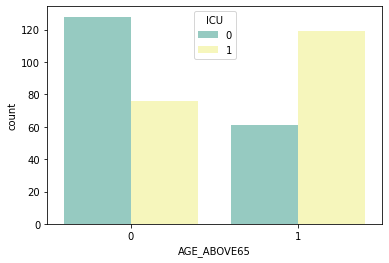

In [135]:
# AGE_ABOVE65
ax = sns.countplot(x="AGE_ABOVE65", hue="ICU", data=final_Icu_df, palette = "Set3")

## Those over the age of 65 are more likely to require an intensive care unit

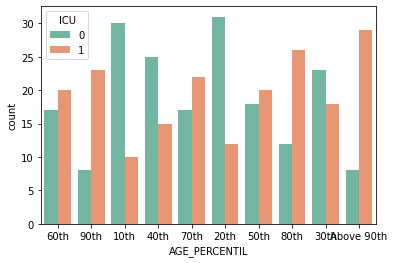

In [136]:
ax = sns.countplot(x="AGE_PERCENTIL", hue="ICU", data=final_Icu_df ,palette = "Set2")

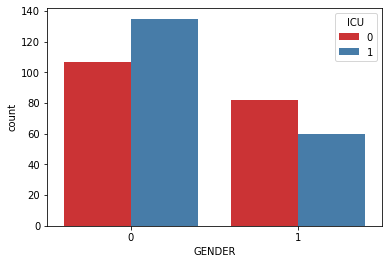

In [137]:
ax = sns.countplot(x="GENDER", hue="ICU", data=final_Icu_df, palette = "Set1")

## Put all three features in one plot to see them all.

In [138]:
icu_count = [final_Icu_df[ final_Icu_df['ICU']==0 ].shape[0],  final_Icu_df[ final_Icu_df['ICU']==1 ].shape[0] ]

gender_count = [ final_Icu_df[ (final_Icu_df['ICU']==0) & (final_Icu_df['GENDER']==0)].shape[0], 
                final_Icu_df[ (final_Icu_df['ICU']==1) & (final_Icu_df['GENDER']==0)].shape[0] ]

above65_count = [final_Icu_df[ (final_Icu_df['ICU']==0) & (final_Icu_df['AGE_PERCENTIL']==1) ].shape[0],  
                 final_Icu_df[ (final_Icu_df['ICU']==1) & (final_Icu_df['AGE_PERCENTIL']==1) ].shape[0] ]

plot_df = pd.DataFrame(list(zip(icu_count, gender_count, above65_count)), columns =['icu_count', 'gender_count','AGE_PERCENTIL_count']) 

plot_df

,icu_count,gender_count,AGE_PERCENTIL_count
0,189,107,0
1,195,135,0


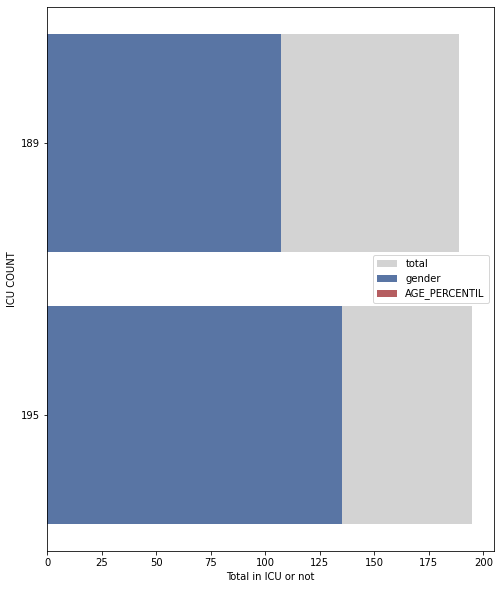

In [139]:
sns.set_color_codes("deep")
fig = plt.subplots(figsize=(8,10))

ax = sns.barplot(x="icu_count", y="icu_count", data=plot_df, label="total", orient='h', color="lightgray")

sns.barplot(x="gender_count", y="icu_count", data=plot_df, label="gender", orient='h', color="b")

sns.barplot(x="AGE_PERCENTIL_count", y="icu_count", data=plot_df, label="AGE_PERCENTIL" , orient='h', color="r")

ax.set(ylabel="ICU COUNT",xlabel="Total in ICU or not")
plt.legend()

#The number of patients NOT admitted to the ICU is 189, and the number of patients admitted to the ICU is 195.

In [140]:
# create a temporary Icu_dfframe
icu_count = [final_Icu_df[ final_Icu_df['ICU']==0 ].shape[0],  final_Icu_df[ final_Icu_df['ICU']==1 ].shape[0] ]

gender_count = [ final_Icu_df[ (final_Icu_df['ICU']==0) & (final_Icu_df['GENDER']==0)].shape[0], 
                final_Icu_df[ (final_Icu_df['ICU']==1) & (final_Icu_df['GENDER']==0)].shape[0] ]

above65_count = [final_Icu_df[ (final_Icu_df['ICU']==0) & (final_Icu_df['AGE_ABOVE65']==1) ].shape[0],  
                 final_Icu_df[ (final_Icu_df['ICU']==1) & (final_Icu_df['AGE_ABOVE65']==1) ].shape[0] ]

plot_df = pd.DataFrame(list(zip(icu_count, gender_count, above65_count)), columns =['icu_count', 'gender_count','above65_count']) 

plot_df

,icu_count,gender_count,above65_count
0,189,107,61
1,195,135,119


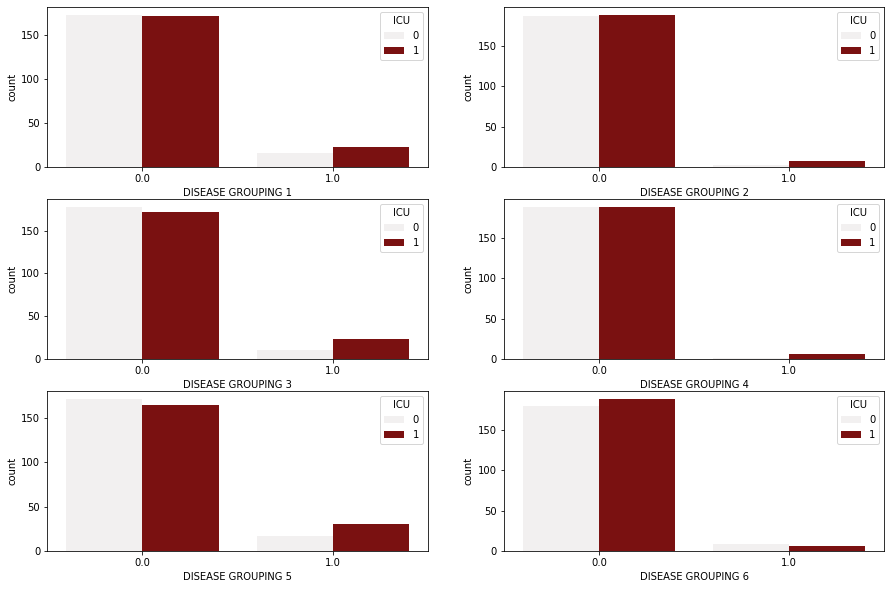

In [141]:
disease_grp = ['DISEASE GROUPING 1','DISEASE GROUPING 2','DISEASE GROUPING 3',
               'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6']

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(15,10))

col = 0

for i in range(len(disease_grp)):
    sns.countplot(x=disease_grp[i], hue="ICU", data=final_Icu_df, ax = axes[int((i)/2)][col],color = 'darkred')
    col = (col+1) % 2

<AxesSubplot:xlabel='AGE_PERCENTIL', ylabel='count'>

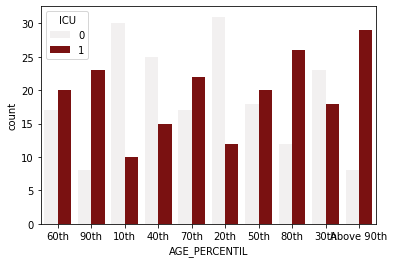

In [142]:
#Attribute to age percentile
sns.countplot(x="AGE_PERCENTIL", hue="ICU", data=final_Icu_df,color = 'darkred')


###### We have a reasonable dataset, in light of the fact that the quantity of passages/columns/patients owned up to ICU and the quantity of sections not admitte to ICUis practically equivalent.As a result, there is no imbalance in the target variable.

<AxesSubplot:xlabel='ICU', ylabel='count'>

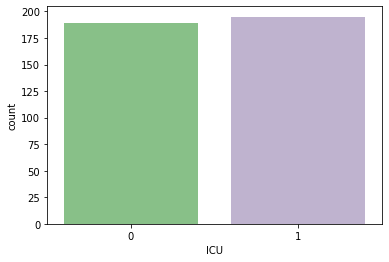

In [143]:
sns.countplot(x="ICU", data=final_Icu_df, palette = "Accent" )

In [144]:
final_Icu_df.isna().sum()

PATIENT_VISIT_IDENTIFIER            0
AGE_ABOVE65                         0
AGE_PERCENTIL                       0
GENDER                              0
DISEASE GROUPING 1                  0
DISEASE GROUPING 2                  0
DISEASE GROUPING 3                  0
DISEASE GROUPING 4                  0
DISEASE GROUPING 5                  0
DISEASE GROUPING 6                  0
HTN                                 0
IMMUNOCOMPROMISED                   0
OTHER                               0
ALBUMIN_MEDIAN                      1
ALBUMIN_DIFF                        1
BE_ARTERIAL_MEDIAN                  1
BE_VENOUS_MEDIAN                    1
BIC_ARTERIAL_MEDIAN                 1
BIC_VENOUS_MEDIAN                   1
BILLIRUBIN_MEDIAN                   1
BLAST_MEDIAN                        1
CALCIUM_MEDIAN                      1
CREATININ_MEDIAN                    1
FFA_MEDIAN                          1
GGT_MEDIAN                          1
GLUCOSE_MEDIAN                      1
HEMATOCRITE_

In [145]:
final_Icu_df.fillna(method='ffill', inplace = True)
final_Icu_df.fillna(method='bfill', inplace = True)

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [147]:
Icu_df_final2 = pd.get_dummies(final_Icu_df)

In [148]:
X = Icu_df_final2.drop(['ICU'], axis = 1)
y = Icu_df_final2[['ICU']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### A supervised learning algorithm is random forests.Regression and classification are two possible applications for it.Additionally, it is the most adaptable and simple to use algorithm.The trees make up a forest.

Random Forest Model best params:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 200}
Accuracy for Random Forest Model is :  0.87


Classification report for Random Forest Model:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        36
           1       0.90      0.85      0.88        41

    accuracy                           0.87        77
   macro avg       0.87      0.87      0.87        77
weighted avg       0.87      0.87      0.87        77



Confusion matrix for Random Forest Model:


<AxesSubplot:>

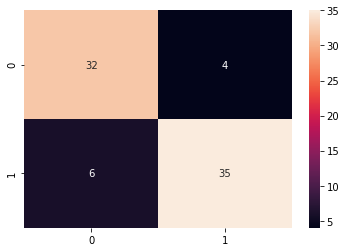

In [149]:
# Random Forest Classifier Model

rf = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [1000, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8],
    'criterion' :['gini', 'entropy']
}

cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
cv_rf.fit(X_train, y_train.values.ravel())

print("Random Forest Model best params: ", cv_rf.best_params_)

# Training model with best params
best_params = cv_rf.best_params_

rf_best = RandomForestClassifier(random_state = 42, 
                                 criterion = best_params['criterion'], 
                                 n_estimators =  best_params['n_estimators'], 
                                 max_depth = best_params['max_depth'], 
                                 max_features= best_params['max_features'])

rf_best.fit(X_train, y_train)
y_pred = rf_best.predict(X_test)

# Evaluating the model
print("Accuracy for Random Forest Model is : ", round(accuracy_score(y_test, y_pred), 2))

print("\n\nClassification report for Random Forest Model:")
print(classification_report(y_test, y_pred))

print("\n\nConfusion matrix for Random Forest Model:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

#### When compared to other classifiers like logistic regression and decision trees, SVM has a very high accuracy.

Support Vector Machines Model best params:  {'C': 100, 'gamma': 0.001}
Accuracy for Support Vector Machines is :  0.69


Classification report for Support Vector Machines:
              precision    recall  f1-score   support

           0       0.62      0.83      0.71        36
           1       0.79      0.56      0.66        41

    accuracy                           0.69        77
   macro avg       0.71      0.70      0.69        77
weighted avg       0.71      0.69      0.68        77



Confusion matrix for Support Vector Machines:


<AxesSubplot:>

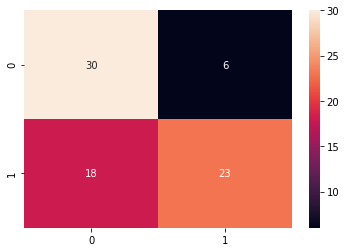

In [150]:
# SVM model

svm = SVC()

param_grid = { 
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}

cv_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)
cv_svm.fit(X_train, y_train.values.ravel())

print("Support Vector Machines Model best params: ", cv_svm.best_params_)

# Training model with best params
best_params = cv_svm.best_params_

svm_best = SVC(random_state = 42, 
              C = best_params['C'], 
              gamma = best_params['gamma'])

svm_best.fit(X_train, y_train)
y_pred = svm_best.predict(X_test)

# Evaluating the model
print("Accuracy for Support Vector Machines is : ", round(accuracy_score(y_test, y_pred), 2))

print("\n\nClassification report for Support Vector Machines:")
print(classification_report(y_test, y_pred))

print("\n\nConfusion matrix for Support Vector Machines:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

#### A decision tree is a structure similar to a flowchart in which each leaf node represents the outcome, the branch represents a decision rule, and the internal node represents a feature (or attribute).The root node is the node at the very top of a decision tree.It learns to divide according to the value of attributes.

Decision Tree Model best params:  {'criterion': 'entropy', 'max_depth': 4}
Accuracy for Decision Tree Model is :  0.83


Classification report for Decision Tree Model:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        36
           1       0.85      0.83      0.84        41

    accuracy                           0.83        77
   macro avg       0.83      0.83      0.83        77
weighted avg       0.83      0.83      0.83        77



Confusion matrix for Decision Tree Model:


<AxesSubplot:>

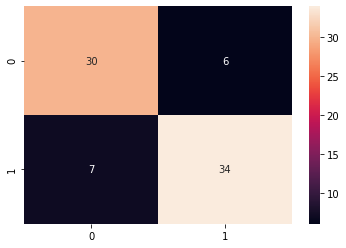

In [151]:
# Decision Tree Model

dt = DecisionTreeClassifier()

param_grid = { 
    'criterion':['gini','entropy'],
    'max_depth': np.arange(3, 15)
}

cv_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)
cv_dt.fit(X_train, y_train.values.ravel())

print("Decision Tree Model best params: ", cv_dt.best_params_)

# Training model with best params
best_params = cv_dt.best_params_

dt_best = DecisionTreeClassifier(random_state = 42, 
                                 criterion = best_params['criterion'], 
                                 max_depth = best_params['max_depth'])

dt_best.fit(X_train, y_train)
y_pred = dt_best.predict(X_test)

print("Accuracy for Decision Tree Model is : ", round(accuracy_score(y_test, y_pred), 2))

print("\n\nClassification report for Decision Tree Model:")
print(classification_report(y_test, y_pred))

print("\n\nConfusion matrix for Decision Tree Model:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)